In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

#from dc_bigan import BIGAN
from keras.models import load_model


Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [3]:
generator = load_model('generator.h5')

batch_size = 20

z = np.random.normal(size=(batch_size, 1000))
imgs = generator.predict(z)

for i in range(batch_size):
    kspace = imgs[i, :, :, 0] + 1j*imgs[i, :, :, 1]
    mri = np.fft.ifft2(kspace)
    mri = np.fft.ifftshift(np.absolute(mri), (0, 1))
    plt.imshow(mri)
    plt.show()
    plt.imshow(np.absolute(kspace), cmap='gray')
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


IndexError: index 1 is out of bounds for axis 3 with size 1

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


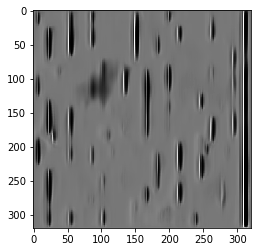

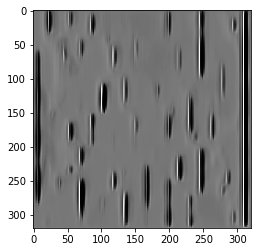

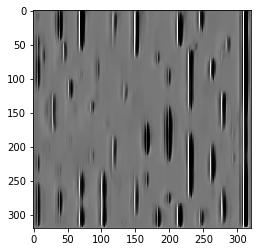

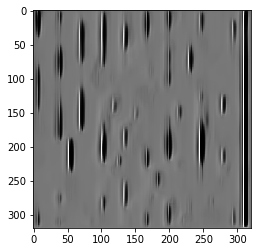

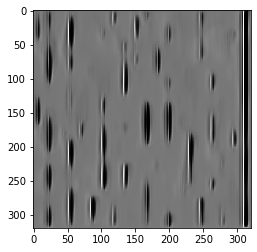

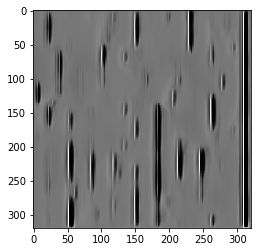

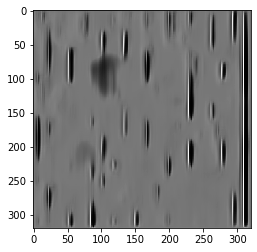

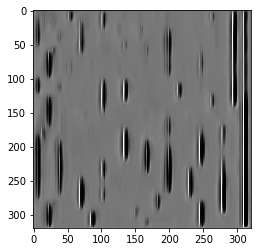

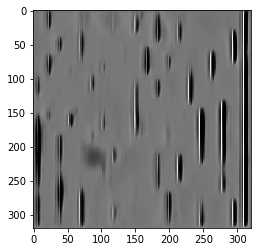

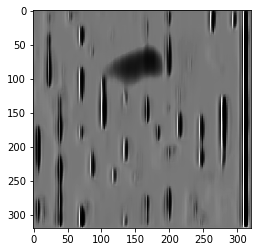

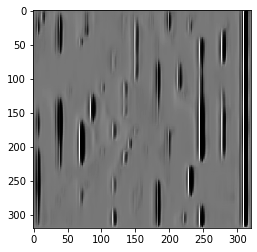

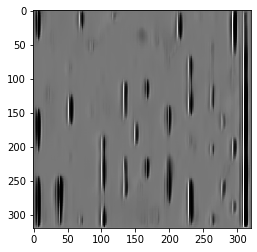

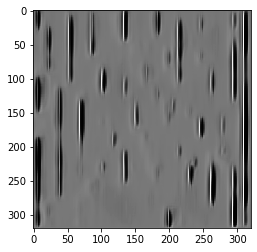

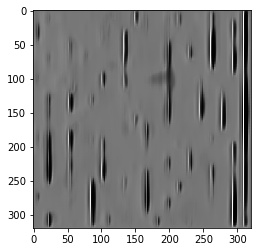

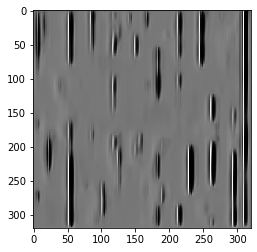

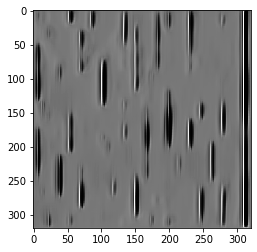

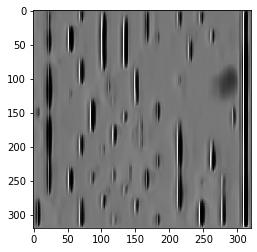

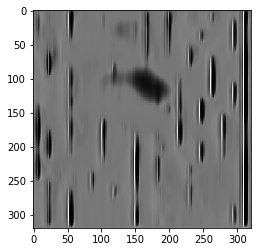

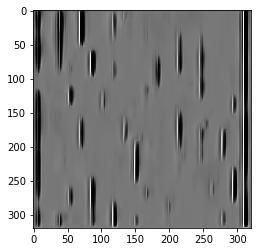

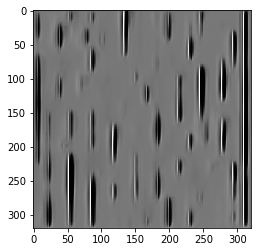

In [2]:
generator = load_model('generator_4.h5')

batch_size = 20

z = np.random.normal(size=(batch_size, 1000))
imgs = generator.predict(z)

for i in range(batch_size):
    mri = imgs[i, :, :, 0]
    
    plt.imshow(mri, cmap='gray')
    plt.show()

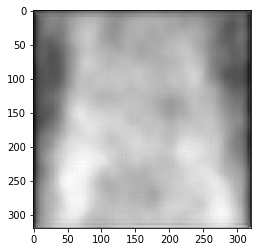

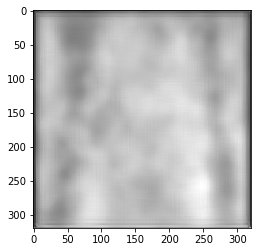

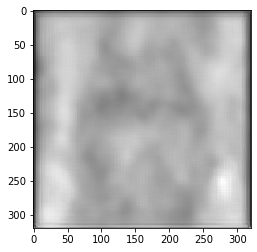

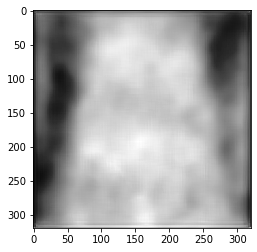

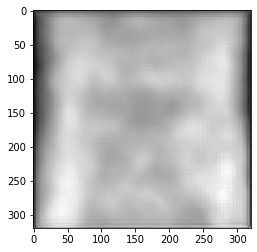

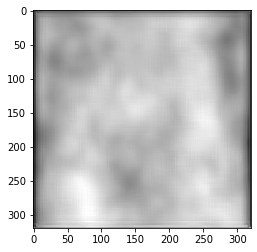

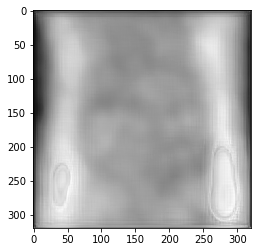

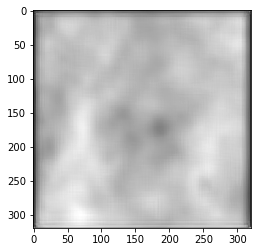

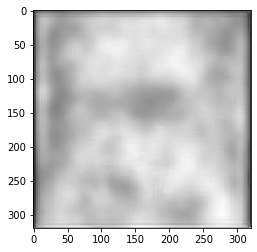

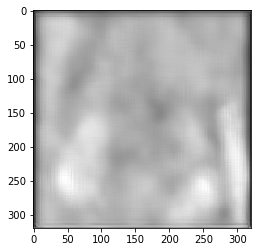

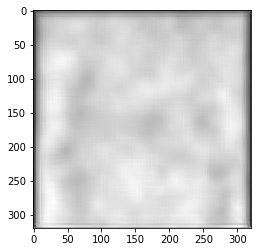

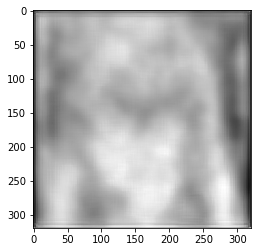

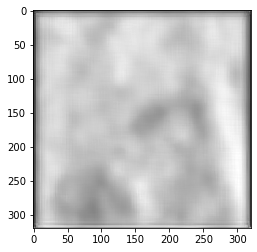

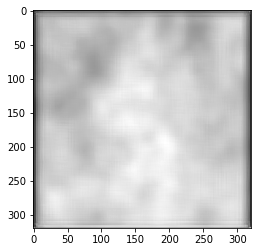

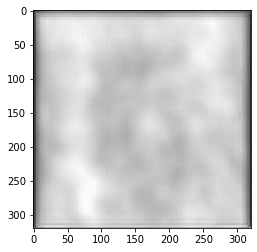

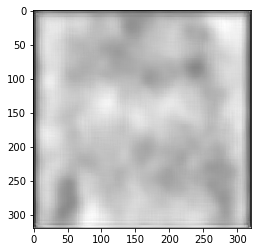

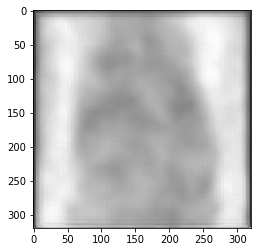

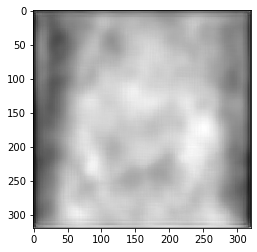

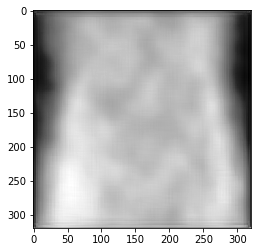

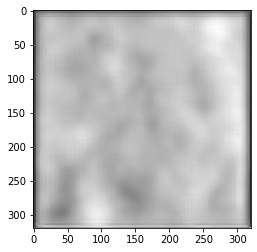

In [3]:
#from dc_aae import AdversarialAutoencoder

generator = load_model('decoder_aae.h5')

batch_size = 20

z = np.random.normal(size=(batch_size, 100))
imgs = generator.predict(z)

for i in range(batch_size):
    mri = imgs[i, :, :, 0]
    
    plt.imshow(mri, cmap='gray')
    plt.show()

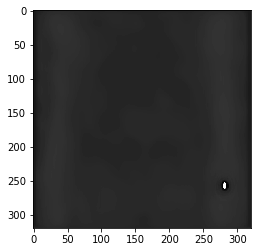

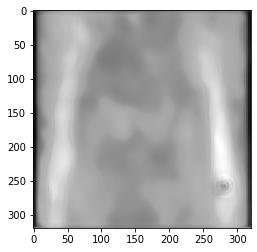

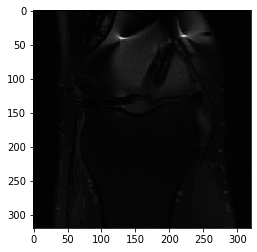

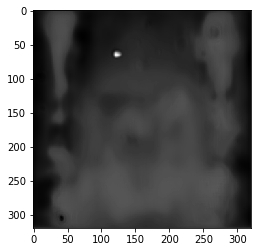

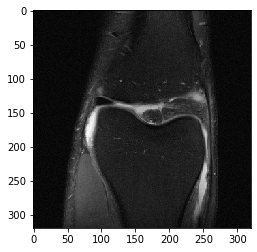

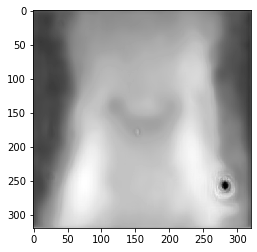

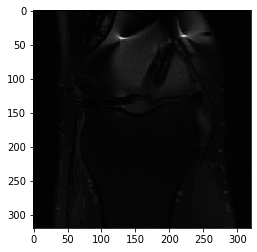

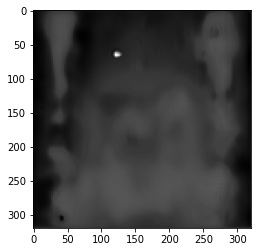

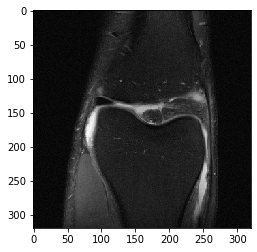

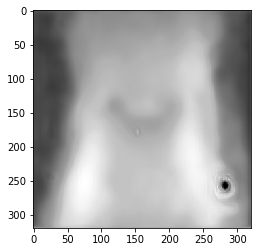

In [8]:
import os

encoder = load_model('encoder_aae.h5')
decoder = load_model('decoder_aae.h5')

batch_size = 2

z = np.random.normal(size=(batch_size, 100))
imgs = decoder.predict(z)

for i in range(batch_size):
    mri = imgs[i, :, :, 0]
    
    plt.imshow(mri, cmap='gray')
    plt.show()
    
for i in range(batch_size):
    path = 'Data/singlecoil_train'

    files = sorted(os.listdir(path))

    for file in files[:batch_size]:
        filename = os.path.join(path, file)
        hf = h5py.File(filename)
        mri = hf['reconstruction_rss'][()]
        mri = mri[16, :, :]
        mri = mri[np.newaxis, :, :, np.newaxis]
        mri = 2 * (mri-np.min(mri))/(np.max(mri)-np.min(mri))-1
        z = encoder.predict(mri)
        mri_r = decoder.predict(z)
        
        mri = np.squeeze(mri)
        mri_r = np.squeeze(mri_r)
        
        plt.imshow(mri, cmap='gray')
        plt.show()
        plt.imshow(mri_r, cmap='gray')
        plt.show()

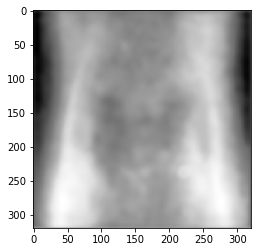

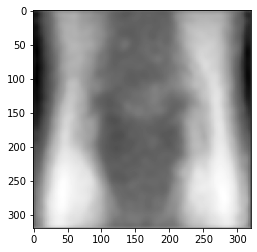

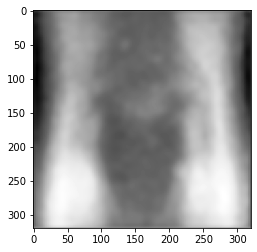

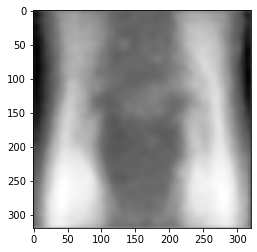

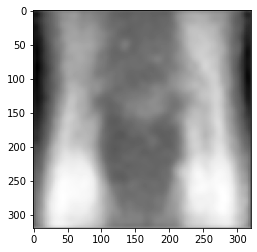

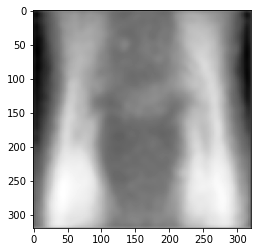

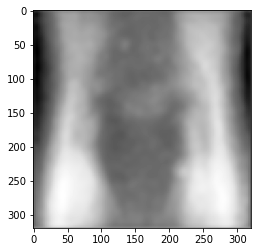

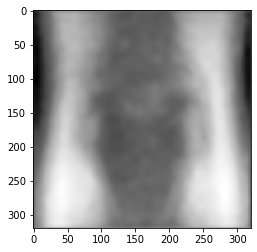

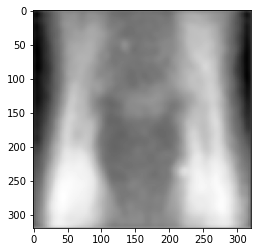

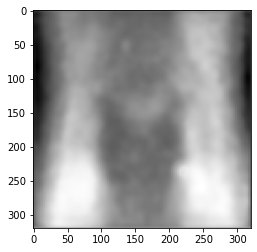

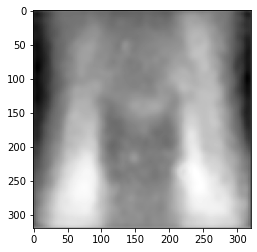

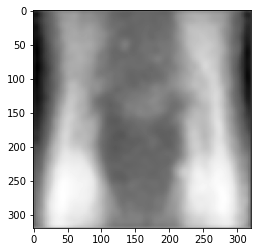

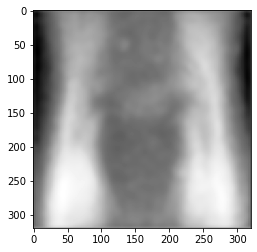

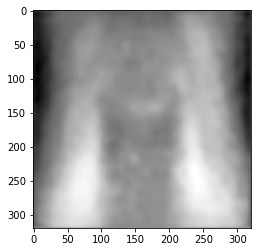

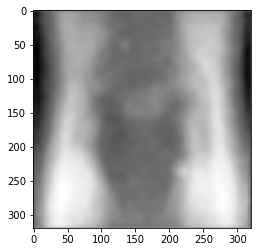

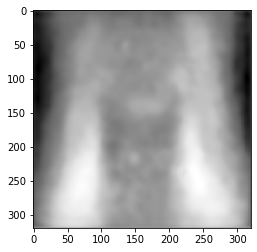

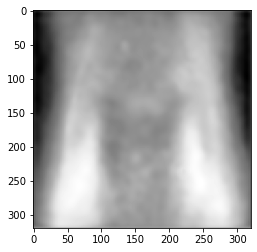

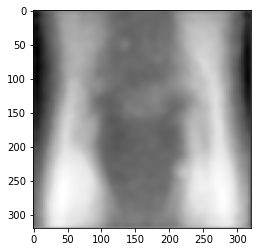

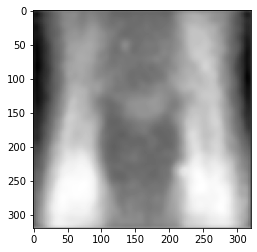

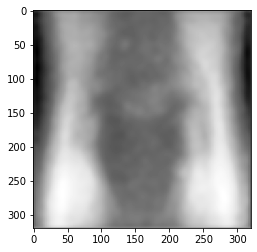

In [3]:
decoder = load_model('Models/decoder_vae.h5')

batch_size = 20

z = np.random.normal(size=(batch_size, 1000))
imgs = decoder.predict(z)

for i in range(batch_size):
    mri = imgs[i, :, :, 0]

    plt.imshow(mri, cmap='gray')
    plt.savefig(f'Images/{i}_vae.png')
    plt.show()